<a href="https://colab.research.google.com/github/ZackWongAPO/Colab/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas基础操作

In [1]:
import pandas

##加载表格

###可以选择直接像字典操作一样直接创建表格

In [2]:
# create chart
data = {   'date': [1, 2, 3],
        'feat1': [17, 12, 8],
        'feat2': [1.2, 1.2, 2.2]}
Mydf = pandas.DataFrame(data)
print(Mydf.head())

   date  feat1  feat2
0     1     17    1.2
1     2     12    1.2
2     3      8    2.2


###或者是读取现有表格

####先将本地文件上传至Colab云端虚拟机

In [42]:
from google.colab import files
uploaded = files.upload()

Saving 01.xlsx to 01.xlsx


####再加载csv文件或xls文件为pandas表格
>pandas会将表格加载为Dataframe对象，该对象具有多种访问方法，唯独不能像numpy数组那样直接取出数据

In [43]:
# csv_file = pandas.read_csv("/content/chicago_taxi_train.csv")   # load .csv

xls_file = pandas.read_excel("01.xlsx")      # load .xls

###查看自己已经加载好的表格
>至此表格已经加载完毕，可以进行数据预处理和特征工程操作了


In [44]:
# print(csv_file.head())
# print(csv_file.columns) # colums 指的是有多少个特征值（纵列标签）
# print('一共有{0}个数据\n\n'.format(len(csv_file.index))) # index 指的是有多少组数据（横行索引）

print(xls_file.head())
print(xls_file.columns)
print('一共有{0}个数据\n\n'.format(len(xls_file.index))) # index 指的是有多少个数据

   Unnamed: 0      Date      year     month       day       AQI      PM25  \
0           0  0.000000  0.472203  0.497908  0.030695  0.201633  0.180837   
1           1  0.000225  0.472203  0.497908  0.046850  0.498733  0.499673   
2           2  0.000450  0.472203  0.497908  0.063005  0.439594  0.431001   
3           3  0.000676  0.472203  0.497908  0.079160  0.236835  0.210268   
4           4  0.000901  0.472203  0.497908  0.095315  0.074908  0.063113   

       PM10       SO2        CO       NO2  
0  0.215712  0.393000  0.264476  0.294159  
1  0.396804  0.432875  0.295775  0.440195  
2  0.304927  0.432875  0.233177  0.499305  
3  0.214381  0.260080  0.201878  0.276773  
4  0.079893  0.198051  0.139280  0.262865  
Index(['Unnamed: 0', 'Date', 'year', 'month', 'day', 'AQI', 'PM25', 'PM10',
       'SO2', 'CO', 'NO2'],
      dtype='object')
一共有2215个数据




##表格数据处理基础(*增删改查*)

###查
>DataFrame对象是一个二维表格，可拆分为行的集合或列的集合，每一行或每一列都可以被看做一个Series对象，这使得pandas可以一次实现整行或整列的操作。每个单元格事实上也被视为一个一行一列的Series对象

####查找特定行和列

In [16]:
# 所有查询都是返回Series对象
hang = xls_file.loc[1]  # 查询单行
lie = xls_file['Date']  # 查询单列
lie = xls_file.loc[:, 'Date'] # 查询单列

# 所有查询都是返回Series对象列表
manyhang = xls_file.loc[1:3]      # 查询多行
manylie = xls_file[['Date', 'PM25']]  # 查询多列

print(hang.head())
print(lie.head())
print(manyhang.head())
print(manylie.head())

Date        1.0
year     2013.0
month      12.0
day         3.0
AQI       356.0
Name: 1, dtype: float64
0    0
1    1
2    2
3    3
4    4
Name: Date, dtype: int64
   Date  year  month  day  AQI   PM25  PM10   SO2   CO  NO2  O3_8h
1     1  2013     12    3  356  306.0   299  98.0  1.9  127   21.0
2     2  2013     12    4  314  264.0   230  98.0  1.5  144   24.0
3     3  2013     12    5  170  129.0   162  59.0  1.3   80   36.0
   Date   PM25
0     0  111.0
1     1  306.0
2     2  264.0
3     3  129.0
4     4   39.0


####查找特定的单元格

In [19]:
# 有四种查询方式，返回值不一样
colum = xls_file.loc[1, 'Date']# 单元格对象 = 表格.loc[横列索引值， 纵列标签值]

colum = xls_file.iloc[1, 1]  # 单元格数据本身 = 表格.iloc[横列索引值， 纵列索引值]

data = xls_file.at[1, 'Date'] # 单元格数据本身 = 表格.at[横列索引值， 纵列标签值]
print(colum)
print(data)

2013
1


####查找子表格

In [20]:
chart = xls_file.loc[[2, 3], ['Date','PM25']]
print(chart.head())

   Date   PM25
2     2  264.0
3     3  129.0


###增

####增加新行列

In [22]:
# 方法一：复制新行或新列的Series对象再遍历法赋值
xls_file['NewFeature'] = xls_file['Date']
for i in range(0,len(xls_file.index)):
  xls_file.at[i,'NewFeature'] = 'string'


<ipython-input-22-987a1b2a6323>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'string' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  xls_file.at[i,'NewFeature'] = 'string'


##快速分析数据集

In [31]:
# 获取数据集的全部统计数据
xls_file.describe(include='all')

# What is the maximum AQI?
max_AQI = xls_file['AQI'].max()
print("What is the maximum AQI? \t\t\t\tAnswer: {0}".format(max_AQI))

# What is the mean PM2.5?
mean_PM25 = xls_file['PM25'].mean()
print("What is the mean PM2.5? \t\tAnswer: {0}".format(mean_PM25))

# # How many quality levels are in the dataset?
# num_unique_quality_level =  xls_file['质量等级'].nunique()
# print("How many quality levels are in the dataset? \t\tAnswer: {0}".format(num_unique_quality_level))

# # What is the most frequent quality level?
# most_freq_quality_level = xls_file['质量等级'].value_counts().idxmax()
# print("What is the most frequent quality level? \t\tAnswer: {0}".format(most_freq_quality_level))

# Are any features missing data?
missing_values = xls_file.isnull().sum().sum()
print("Are any features missing data? \t\t\t\tAnswer:", "No" if missing_values == 0 else "Yes")

What is the maximum AQI? 				Answer: 356
What is the mean PM2.5? 		Answer: 40.033860045146724
Are any features missing data? 				Answer: Yes


###研究属性与预测值之间的相关性



>利用散点图直观的看出属性值与预测值之间的关系，优点是可以看出除了直线型相关之外的其他相关性，缺点是缺乏衡量标准且主要凭借开发者经验，由数值分析的内容可知，在拟合时会遇到基的选取问题，而这个基可以不仅仅是多项式，还可以是指数基、对数基甚至是三角基。

>使用相关矩阵进行分析可以快速并准确地发现各属性与预测结果之间的线性相关性，甚至是发现属性之间的线性相关性，这样就可以减少需要分析的可解释属性量
>>相关性这一概念是由点乘这一概念引申过来的，因为点乘同时会涉及到两向量模长与夹角值的大小，将点乘转化至高维空间便成为了内积，但是内积值没有被归一化，你不能说原本就大的两向量比原本就小的两个向量更为相关(夹角一致的前提下)，所以再用内积值除以向量本身的模长来进行归一化，就会直呈现两个向量之间的夹角关系。(协方差与相关系数可以理解为统计学中的内积)
* `1.0`: 完全直线性正相关
* `-1.0`: 完全直线型负相关
* `0.0`: 两向量间直线性不相关



In [25]:
# 观察数据集的相关矩阵
xls_file.corr(numeric_only = True)

,Date,year,month,day,AQI,PM25,PM10,SO2,CO,NO2,O3_8h
Date,1.000000,0.986137,0.123907,0.013242,-0.092576,-0.239183,-0.120757,-0.503623,-0.293826,-0.298359,0.075964
year,0.986137,1.000000,-0.041890,-0.002546,-0.074347,-0.218985,-0.097299,-0.478466,-0.273066,-0.295932,0.087283
month,0.123907,-0.041890,1.000000,0.012567,-0.114134,-0.131962,-0.147498,-0.174661,-0.140109,-0.030591,-0.066391
day,0.013242,-0.002546,0.012567,1.000000,0.010374,0.001486,0.016989,0.013142,0.013624,0.030559,0.049650
AQI,-0.092576,-0.074347,-0.114134,0.010374,1.000000,0.840454,0.834786,0.450492,0.620895,0.550180,0.266832
PM25,-0.239183,-0.218985,-0.131962,0.001486,0.840454,1.000000,0.869745,0.637476,0.807569,0.718248,-0.119168
PM10,-0.120757,-0.097299,-0.147498,0.016989,0.834786,0.869745,1.000000,0.527824,0.692095,0.669425,-0.004023
SO2,-0.503623,-0.478466,-0.174661,0.013142,0.450492,0.637476,0.527824,1.000000,0.740841,0.740156,-0.340359
CO,-0.293826,-0.273066,-0.140109,0.013624,0.620895,0.807569,0.692095,0.740841,1.000000,0.778000,-0.274257
NO2,-0.298359,-0.295932,-0.030591,0.030559,0.550180,0.718248,0.669425,0.740156,0.778000,1.000000,-0.230173


1.   由上表可发现AQI与臭氧浓度没有太大线性相关性，建议画散点图从而进一步发掘两者之间的其他相关性。
2.   PM2.5与PM10之间有很强的线性相关性，我甚至感觉预测的时候只用PM2.5或是PM10的指标进行预测就足矣了。
3.   空气污染情况与AQI是直接相关的分段函数关系，可以忽略该属性

>用seaborn库进行**pair plot**(*成对散点图*)的绘制，从而进一步发现属性之间的其余相关性

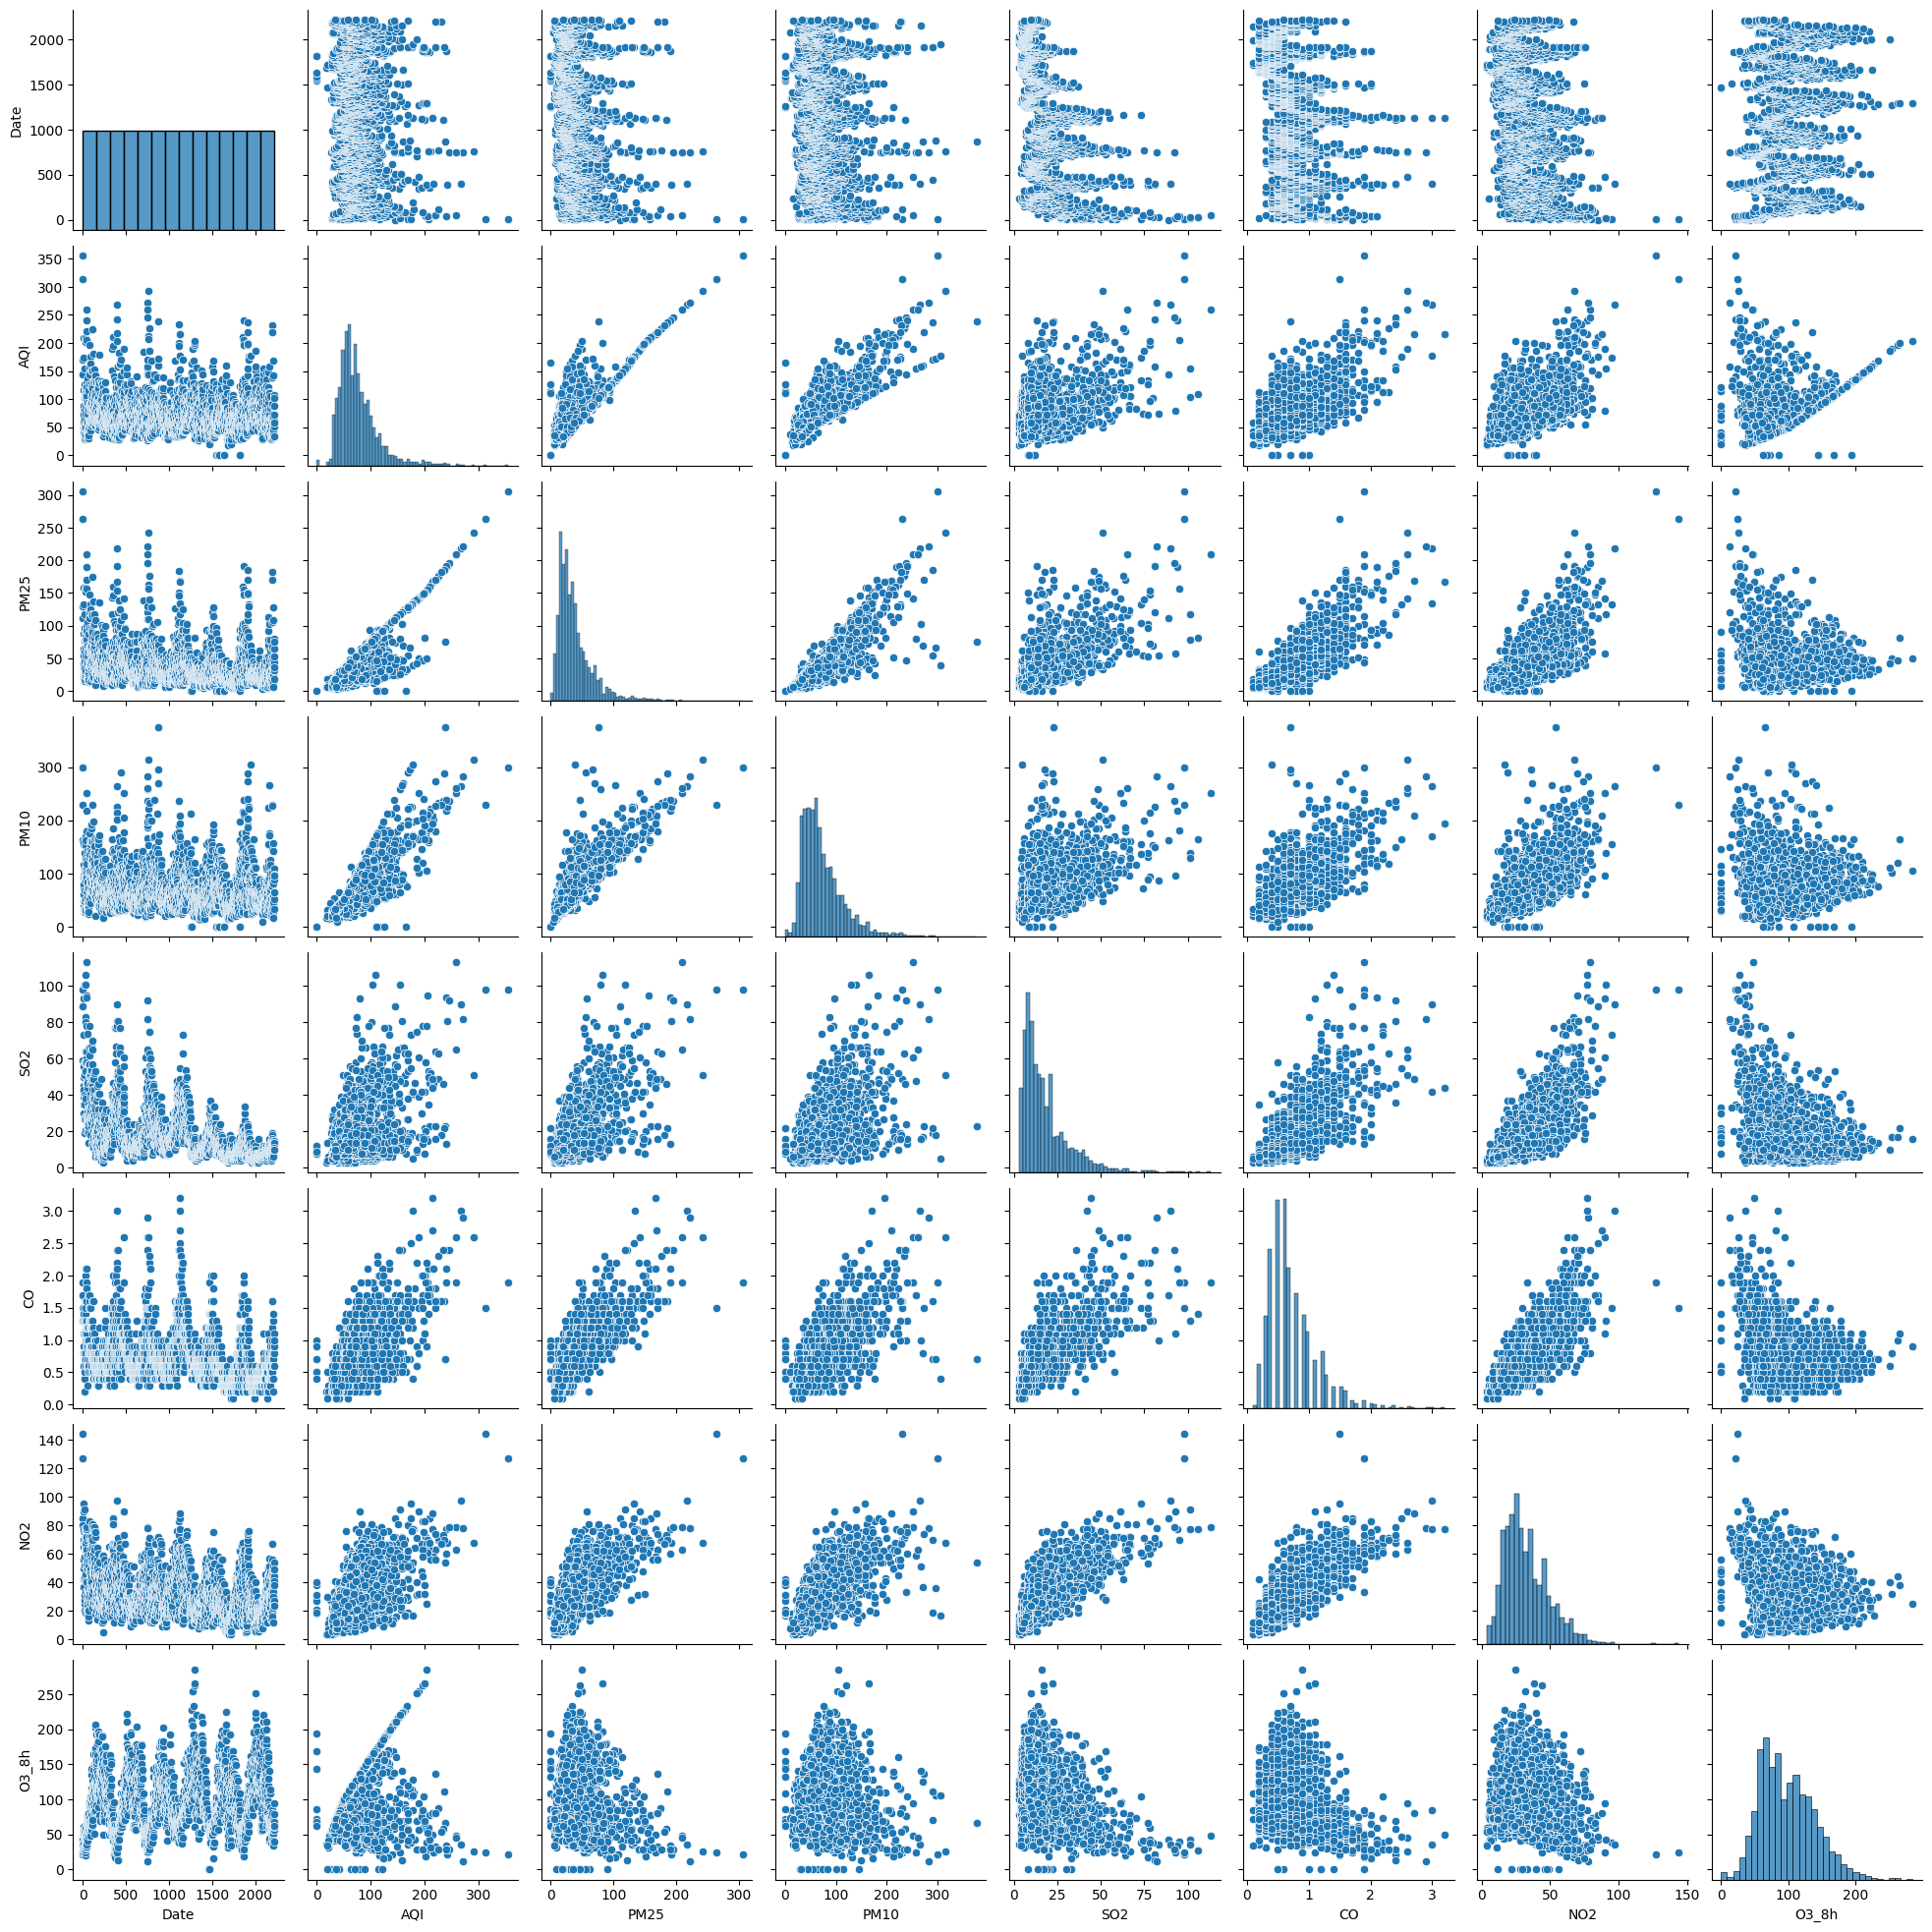

In [26]:
import seaborn
seaborn.pairplot(xls_file, x_vars=['Date', 'AQI', 'PM25', 'PM10', 'SO2', 'CO', 'NO2', 'O3_8h'],
                 y_vars=['Date', 'AQI', 'PM25', 'PM10', 'SO2', 'CO', 'NO2', 'O3_8h'])

>由上图可知日期和AQI成明显周期关系，肯定是要把这个属性再次进行拆分的，臭氧是因为夏季雨季比较多,可以尝试把臭氧这个属性去除

##数据插补


>观察数据容易发现少部分数据是空缺的，这部分数据因为只占用很小的体量，可以选择直接删除，但是仔细观察后发现该数据集存在不少异常值，该日PM值为0，可以使用末位插补法进行数据填充，取同季节最近似AQI的PM值即可

##数据归一化

In [35]:
# 应用转换公式并将结果存储在新列中
for name in xls_file.columns:
    # 计算当前列的最大值和最小值
    max_value = xls_file[name].max()
    min_value = xls_file[name].min()

    # 创建新列名，避免覆盖原始列
    new_column_name = name + '_N'

    # 应用转换公式
    xls_file[new_column_name] = (xls_file[name] - 0.1 * min_value) / (2 * max_value - 0.1 * min_value)

# 将处理后的数据存储回Excel文件
# 如果需要覆盖原文件，可以使用sheet_name='Sheet1'指定工作表名称
xls_file.to_excel("D:\Python Projects\MachineLearning\DataSet\AirPollution\AirPollutionNewInserted01.xlsx")

print("数据已成功处理并存储到Excel文件。")

数据已成功处理并存储到Excel文件。


至此Pandas数据预处理以及特征工程处理完成